# Notebook for plotting

In [70]:
import pathlib
import sys

script_dir = pathlib.Path().parent.absolute()
parent_dir = script_dir.parents[0]
sys.path.append(str(parent_dir))

import xarray as xr
import os
from labsea_project import utilities, plotters, tools
from labsea_project import reference_func as ref
import numpy as np
import matplotlib.pyplot as plt
import gsw
from matplotlib.colors import LinearSegmentedColormap, BoundaryNorm, Normalize
import cmocean
import scipy


#suppress syntax warnings
import warnings
warnings.filterwarnings("ignore", category=SyntaxWarning)


### calculate absolute geostrophic velocities and overturning streamfunctions and plot results

### xstart = 200

In [233]:
# x=200
# define grid
spacing_z, spacing_x = 25, 10
xstart, xend = 200, 860
z = np.arange(0, 2000 + spacing_z, spacing_z)*-1*10**(-3) # convert to km
x = np.arange(200, 860 + spacing_x, spacing_x)
xhalf_200 = (x[1:] + x[:-1])/2
Xhalf_200, Zhalf_200 = np.meshgrid(xhalf_200, z)

x_topo, topo = np.load(parent_dir / 'data/corrected_topography.npy')
X, Z  = np.meshgrid(x, z)

lon_ar7w_200, lat_ar7w_200 = np.load(parent_dir / 'data/coordinates_AR7W_xstart200.npy') # represent coordinates of chosen grid (10km spacing in x)
P_200     = gsw.p_from_z(Z*1e3, lat_ar7w_200)

case = '0413mayjunjul'
file_case = '2004_to_2023_1000db_isobars'
sigma = 30.0

specvol_anom_argo_200, sigma0_argo_200, SA_argo, CT_argo = np.load(parent_dir / f"data/weighted data/weighted_data_{file_case}_{case}_sigma{int(sigma)}_xstart{str(xstart)}_xend{xend}.npy")
# calc. absolute geo velocity by refrencing to 1000m depth velocity
input_file = parent_dir / 'data/yomaha_velocities_referenced_to_1000dbar_new.nc'
poly_func, x0, y0 = ref.derive_poly_func(input_file, start_time='2004-01-01', end_time='2013-12-31', cut_season=True, season='mayjunjul', returnXY=True)
argo_ref_200 = poly_func(xhalf_200) / 100 

v_argo_200, sigma0half_argo_200 = tools.derive_abs_geo_v(specvol_anom_argo_200, sigma0_argo_200, P_200, argo_ref_200, lon_ar7w_200, lat_ar7w_200, xhalf_200, Zhalf_200)
strf_z_argo_200, strf_x_argo_200, imbalance_argo_200, mask_xa_200 = tools.derive_strf(v_argo_200, xhalf_200*1e3, z*-1e3)


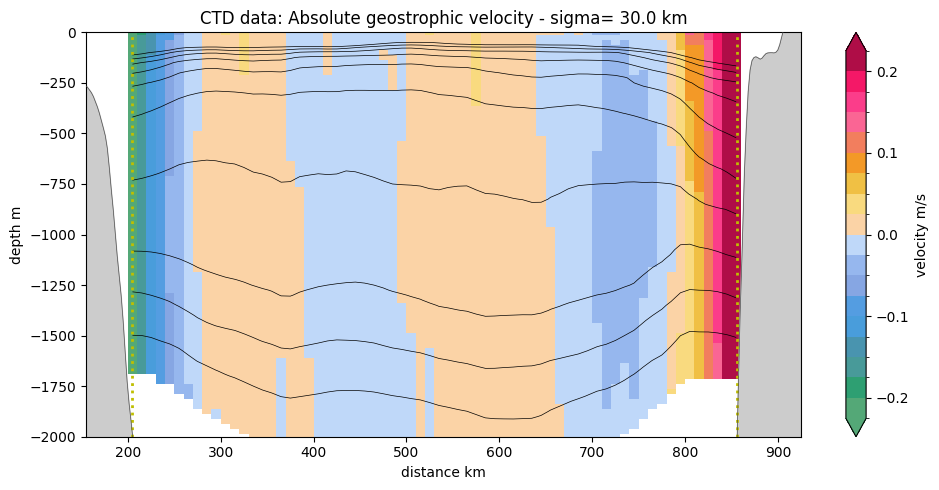

In [229]:
xstart = 200
xend = 860
specvol_anom_ctd_200, sigma0_ctd_200, SA_ctd, CT_ctd = np.load(parent_dir / f'data/weighted data/weighted_data_ctd_sigma{int(sigma)}_xstart{str(xstart)}_xend{xend}.npy')
v_ctd_200, sigma0half_ctd_200   = tools.derive_abs_geo_v(specvol_anom_ctd_200, sigma0_ctd_200, P_200, argo_ref_200, lon_ar7w_200, lat_ar7w_200, xhalf_200, Zhalf_200)
strf_z_ctd_200, strf_x_ctd_200, imbalance_ctd_200, mask_xc_200 = tools.derive_strf(v_ctd_200, xhalf_200*1e3, z*-1e3)

title_string = f'CTD data: Absolute geostrophic velocity - sigma= {sigma} km'
fig_string = f'abs_geo_v_ctd_sigma{int(sigma)}_xstart{str(xstart)}_xend{xend}'
plotters.plot_abs_geo_v(v_ctd_200, sigma0half_ctd_200, Xhalf_200, Zhalf_200, title_string, fig_string, saving=False)

In [226]:
# x=205
# define grid
spacing_z, spacing_x = 25, 10
xstart, xend = 205, 855
z = np.arange(0, 2000 + spacing_z, spacing_z)*-1*10**(-3) # convert to km
x = np.arange(205, 855 + spacing_x, spacing_x)
xhalf_205 = (x[1:] + x[:-1])/2
Xhalf_205, Zhalf_205 = np.meshgrid(xhalf_205, z)

x_topo, topo = np.load(parent_dir / 'data/corrected_topography.npy')
X, Z  = np.meshgrid(x, z)

lon_ar7w_205, lat_ar7w_205 = np.load(parent_dir / 'data/coordinates_AR7W_xstart205.npy')
P_205     = gsw.p_from_z(Z*1e3, lat_ar7w_205)

case = '0413mayjunjul'
file_case = '2004_to_2023_1000db_isobars'
sigma = 30.0

specvol_anom_argo_205, sigma0_argo_205, SA_argo_205, CT_argo_205 = np.load(parent_dir / f"data/weighted data/weighted_data_{file_case}_{case}_sigma{int(sigma)}_xstart{str(xstart)}_xend{xend}.npy")
# calc. absolute geo velocity by refrencing to 1000m depth velocity
input_file = parent_dir / 'data/yomaha_velocities_referenced_to_1000dbar_new.nc'
poly_func, x0, y0 = ref.derive_poly_func(input_file, start_time='2004-01-01', end_time='2013-12-31', cut_season=True, season='mayjunjul', returnXY=True)
argo_ref_205 = poly_func(xhalf_205) / 100 

v_argo_205, sigma0half_argo_205 = tools.derive_abs_geo_v(specvol_anom_argo_205, sigma0_argo_205, P_205, argo_ref_205, lon_ar7w_205, lat_ar7w_205, xhalf_205, Zhalf_205)
strf_z_argo_205, strf_x_argo_205, imbalance_argo_205, mask_xa_205 = tools.derive_strf(v_argo_205, xhalf_205*1e3, z*-1e3)


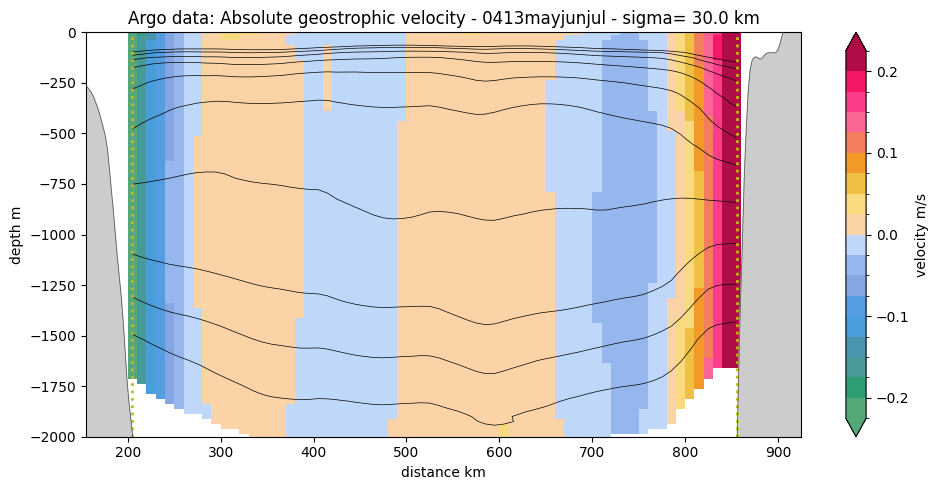

In [11]:
title_string = f'Argo data: Absolute geostrophic velocity - {case} - sigma= {sigma} km'
fig_string = f'abs_geo_v_argo_{case}_sigma{int(sigma)}_xstart{str(xstart)}_xend{xend}'
plotters.plot_abs_geo_v(v_argo_200, sigma0half_argo_200, Xhalf_200, Zhalf_200, title_string, fig_string, saving=False)


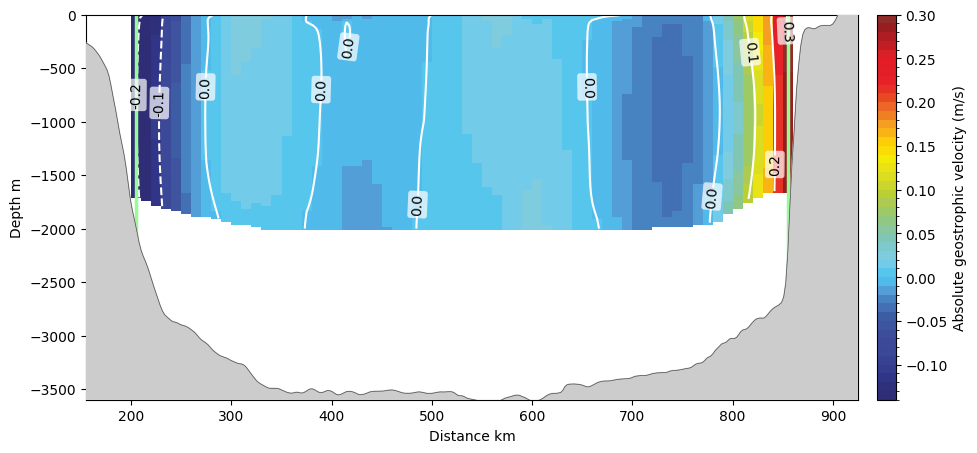

In [294]:
sampled_colors = np.load(parent_dir / 'data/colorbars/colorbar_velocity_HS2017.npy')
vel_cmap = LinearSegmentedColormap.from_list('custom_cmap', sampled_colors, N=256)

plt.figure(figsize=(12,5))
#cf = plt.contourf(Xhalf_200, Zhalf_200*1e3, v_argo_200, levels=np.arange(-0.14, 0.31, 0.01), cmap=vel_cmap.reversed())
value_range = np.arange(-0.14, 0.31, 0.01)
norm = BoundaryNorm(value_range, ncolors=vel_cmap.N, clip=True)
cf = plt.pcolormesh(Xhalf_200, Zhalf_200*1e3, v_argo_200, norm=norm,cmap=vel_cmap.reversed(), shading='auto')
con = plt.contour(Xhalf_200, Zhalf_200*1e3, v_argo_200, levels=[-0.2, -0.1, 0, 0.1, 0.2, 0.3], colors='w', linewidths=1.5)
contour_labels = plt.clabel(con, inline=True, fontsize=10, fmt='%1.1f')
for label in contour_labels:
    label.set_color('k')  # Set the color of the labels
    label.set_bbox(dict(facecolor='white', edgecolor='none', alpha=0.7, boxstyle='round,pad=0.2'))
plt.colorbar(cf, label='Absolute geostrophic velocity (m/s)', orientation='vertical', pad=0.02, aspect=20)
plt.xlim([200, 860])
plt.xlabel('Distance km')
plt.ylabel('Depth m')
plt.axvline(205, color='palegreen', linestyle='-', linewidth=2.5)
plt.axvline(855, color='palegreen', linestyle='-', linewidth=2.5)

# Plot the topography
plt.plot(x_topo, topo * -1, color=[.3, .3, .3], linewidth=0.5, zorder=4)
plt.fill_betweenx(topo * -1, x_topo, where=(x_topo <= 600), color=[.8, .8, .8], zorder=3)
right_mask = (x_topo >= 600)
plt.fill_betweenx(topo[right_mask] * -1, x_topo[right_mask], x2=4000, color=[.8, .8, .8], zorder=3)

plt.xlim([155, 925])
plt.ylim([-3600, 0])
plt.savefig(parent_dir / f'figures/abs_geo_v_argo_sigma{int(sigma)}_xstart200.png', dpi=300, bbox_inches='tight')
plt.show()


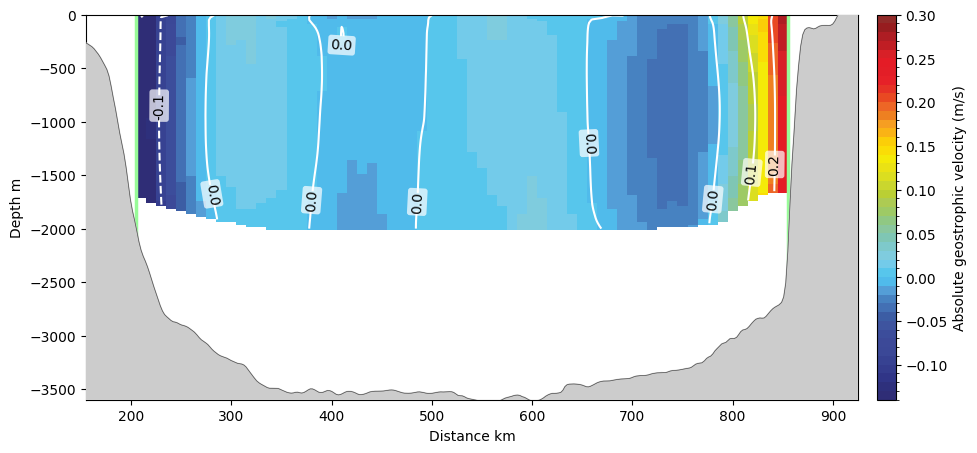

In [ ]:
sampled_colors = np.load(parent_dir / 'data/colorbars/colorbar_velocity_HS2017.npy')
vel_cmap = LinearSegmentedColormap.from_list('custom_cmap', sampled_colors, N=256)

plt.figure(figsize=(12,5))
#cf = plt.contourf(Xhalf_205, Zhalf_205*1e3, v_argo_205, levels=np.arange(-0.14, 0.31, 0.01), cmap=vel_cmap.reversed())
value_range = np.arange(-0.14, 0.31, 0.01)
norm = BoundaryNorm(value_range, ncolors=vel_cmap.N, clip=True)
cf = plt.pcolormesh(Xhalf_205, Zhalf_205*1e3, v_argo_205, norm=norm,cmap=vel_cmap.reversed(), shading='auto')
con = plt.contour(Xhalf_205, Zhalf_205*1e3, v_argo_205, levels=[-0.2, -0.1, 0, 0.1, 0.2, 0.3], colors='w', linewidths=1.5)

contour_labels = plt.clabel(con, inline=True, fontsize=10, fmt='%1.1f')
for label in contour_labels:
    label.set_color('k')  # Set the color of the labels
    label.set_bbox(dict(facecolor='white', edgecolor='none', alpha=0.7, boxstyle='round,pad=0.2'))
plt.colorbar(cf, label='Absolute geostrophic velocity (m/s)', orientation='vertical', pad=0.02, aspect=20)
plt.xlim([200, 860])
plt.xlabel('Distance km')
plt.ylabel('Depth m')
#plt.axvline(205, color='k', linestyle='-', linewidth=1.5)
#plt.axvline(855, color='k', linestyle='-', linewidth=1.5)
plt.axvline(205, color='palegreen', linestyle='-', linewidth=2.5)
plt.axvline(855, color='palegreen', linestyle='-', linewidth=2.5)
# Plot the topography
plt.plot(x_topo, topo * -1, color=[.3, .3, .3], linewidth=0.5, zorder=4)
plt.fill_betweenx(topo * -1, x_topo, where=(x_topo <= 600), color=[.8, .8, .8], zorder=3)
right_mask = (x_topo >= 600)
plt.fill_betweenx(topo[right_mask] * -1, x_topo[right_mask], x2=4000, color=[.8, .8, .8], zorder=3)

plt.xlim([155, 925])
plt.ylim([-3600, 0])
plt.savefig(parent_dir / f'figures/abs_geo_v_argo_sigma{int(sigma)}_xstart205.png', dpi=300, bbox_inches='tight')
plt.show()


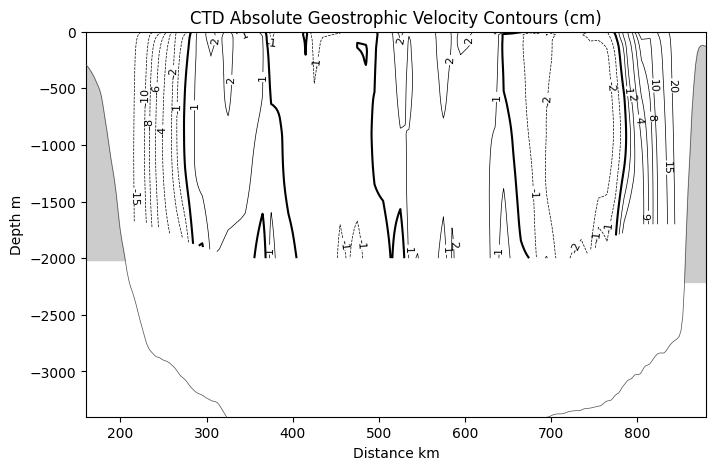

In [ ]:
x_topo, topo = np.load(parent_dir / 'data/corrected_topography.npy')

fig, ax = plt.subplots(figsize=(8, 5))

contour = ax.contour(Xhalf_200, Zhalf_200 * 1e3, v_ctd_200 * 100, 
                     levels=[-15, -10, -8, -6, -4, -2, -1, 1, 2, 4, 6, 8, 10, 15, 20], 
                     colors='k', linewidths=0.5)
ax.clabel(contour, inline=True, fontsize=8, fmt='%d')  # `fmt` formats the labels as integers

contour_zero = ax.contour(Xhalf_200, Zhalf_200 * 1e3, v_ctd_200 * 100, 
                          levels=[0], colors='k', linewidths=1.5)

# Plot the topography
ax.plot(x_topo, topo * -1, color=[.3, .3, .3], linewidth=0.5, zorder=3)
ax.fill_betweenx(topo * -1, x_topo, where=(x_topo <= 205.622405357364), color=[.8, .8, .8], zorder=2)
right_mask = (x_topo >= 855.0984735257368)
ax.fill_betweenx(topo[right_mask] * -1, x_topo[right_mask], x2=1000, color=[.8, .8, .8], zorder=2)

plt.xlim([160, 880])
plt.ylim([-3400, 0])
plt.xlabel('Distance km')
plt.ylabel('Depth m')
plt.title('CTD Absolute Geostrophic Velocity Contours (cm)')
plt.show()

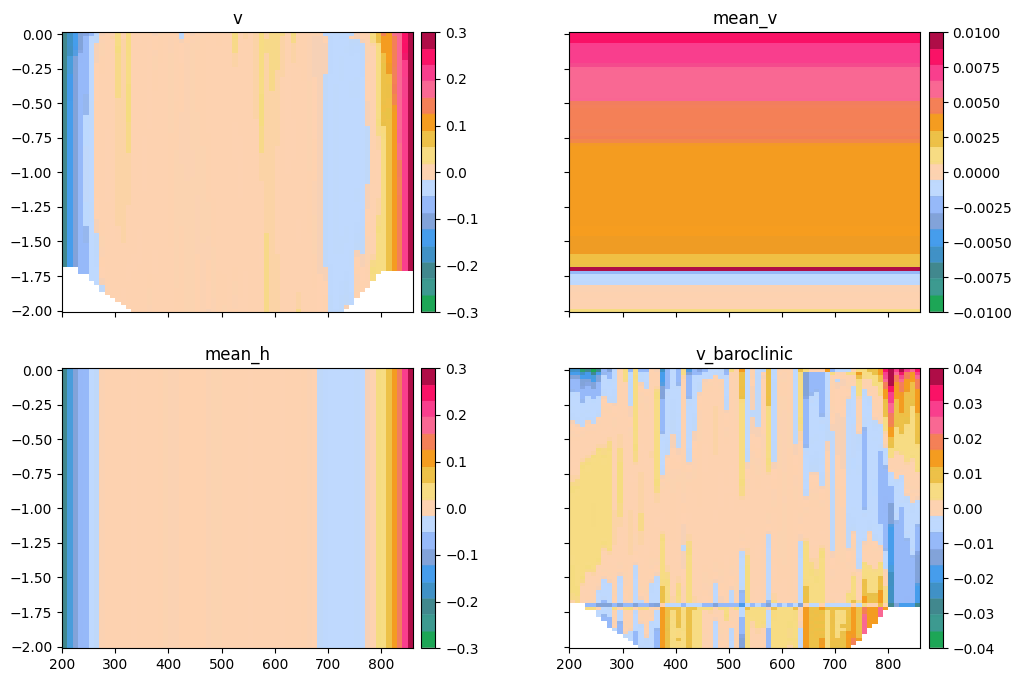

In [315]:
sampled_colors = np.load(parent_dir / 'data/colorbars/colorbar_pink_yellow_blue_green.npy')
vel_cmap = LinearSegmentedColormap.from_list('custom_cmap', sampled_colors, N=256)


fig, ax = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)
ax[0,0].pcolormesh(Xhalf, Zhalf, v, cmap=vel_cmap, shading='auto', vmin=-0.3, vmax=0.3)
#colorbar
cbar = plt.colorbar(ax[0,0].collections[0], ax=ax[0,0], orientation='vertical', pad=0.02, aspect=20)
ax[0,0].set_title('v')

ax[0,1].pcolormesh(Xhalf, Zhalf, mean_v/100, cmap=vel_cmap, shading='auto', vmin=-0.01, vmax=0.01)
#colorbar   
cbar = plt.colorbar(ax[0,1].collections[0], ax=ax[0,1], orientation='vertical', pad=0.02, aspect=20)
ax[0,1].set_title('mean_v')

ax[1,0].pcolormesh(Xhalf, Zhalf, mean_h/100, cmap=vel_cmap, shading='auto', vmin=-0.3, vmax=0.3)
#colorbar
cbar = plt.colorbar(ax[1,0].collections[0], ax=ax[1,0], orientation='vertical', pad=0.02, aspect=20)
ax[1,0].set_title('mean_h')	

ax[1,1].pcolormesh(Xhalf, Zhalf,v_baroclinic/100, cmap=vel_cmap, shading='auto', vmin=-0.04, vmax=0.04)
#colorbar
cbar = plt.colorbar(ax[1,1].collections[0], ax=ax[1,1], orientation='vertical', pad=0.02, aspect=20)
ax[1,1].set_title('v_baroclinic')

plt.show()

c:\Users\schul\OneDrive\Dokumente\Arbeit\Uni HH 2025\labsea-project\labsea-env\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\schul\OneDrive\Dokumente\Arbeit\Uni HH 2025\labsea-project\labsea-env\Lib\site-packages\numpy\_core\_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


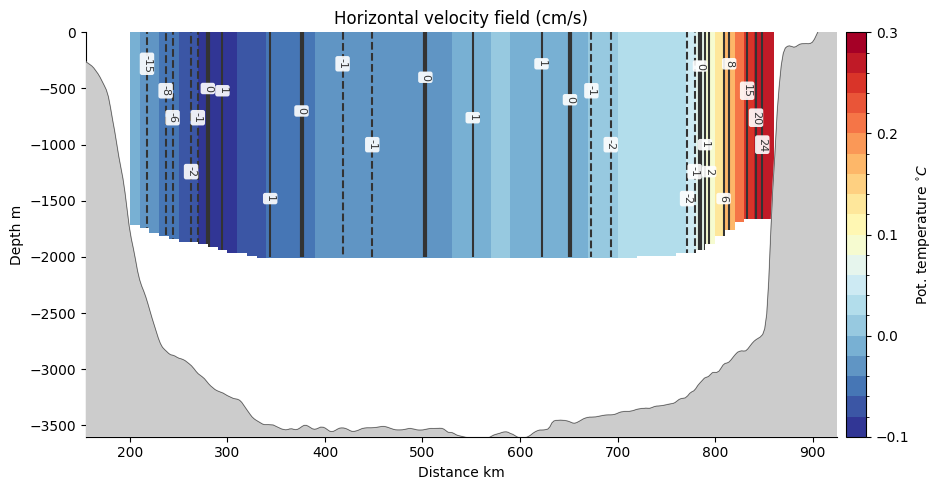

In [335]:
from matplotlib.colors import LinearSegmentedColormap
import numpy.ma as ma

v = v_argo_200
sigma0half = sigma0half_argo_200
Xhalf = Xhalf_200
Zhalf = Zhalf_200
rho_mask_b = sigma0_argo_200 >= 27.8
PT_argo_205 = gsw.pt_from_CT(SA_argo, CT_argo ) # convert to potential temperature

'''
v = v_ctd_200
sigma0half = sigma0half_ctd_200
Xhalf = Xhalf_200
Zhalf = Zhalf_200
rho_mask_b = sigma0_ctd_200 >= 27.8

PT_argo_205 = gsw.pt_from_CT(SA_ctd, CT_ctd ) # convert to potential temperature
'''

xstart, xend = 200, 860
z = np.arange(0, 2000 + spacing_z, spacing_z)*-1*10**(-3) # convert to km
x = np.arange(xstart, xend + spacing_x, spacing_x)
X, Z  = np.meshgrid(x, z)

#205
v = v_argo_205
sigma0half = sigma0half_argo_205
Xhalf = Xhalf_205
Zhalf = Zhalf_205
rho_mask_b = sigma0_argo_205 >= 27.8
PT_argo_205 = gsw.pt_from_CT(SA_argo_205, CT_argo_205 ) # convert to potential temperature

xstart, xend = 205, 855
z = np.arange(0, 2000 + spacing_z, spacing_z)*-1*10**(-3) # convert to km
x = np.arange(xstart, xend + spacing_x, spacing_x)
X, Z  = np.meshgrid(x, z)

# mean vertical velocity field
mean_v = np.zeros_like(v)
for k in range(v.shape[1]):
    mean_v[:, k] = np.nanmean(v, axis=1) * 100  # cm

mean_pt_v = np.zeros_like(PT_argo_205)
for k in range(PT_argo_205.shape[1]):
    mean_pt_v[:,k] = np.nanmean(PT_argo_205, axis=1)

# mean horizontal velocity field
v_prime = v*100 - mean_v
mean_h = np.zeros_like(v)
for k in range(v.shape[0]):
    mean_h[k,:] = np.nanmean(v_prime, axis=0) 

PT_argo_prime = PT_argo_205 - mean_pt_v
mean_pt_h = np.zeros_like(PT_argo_205)
for k in range(PT_argo_prime.shape[0]):   
    mean_pt_h[k,:] = np.nanmean(PT_argo_prime, axis=0)

# baroclinic field
v_baroclinic = np.zeros_like(v)
for k in range(v.shape[0]):
    v_baroclinic[k,:] = v_prime[k,:] - mean_h[k,:]

pt_baroclinic = np.zeros_like(PT_argo_205)
for k in range(PT_argo_prime.shape[0]):
    pt_baroclinic[k,:] = PT_argo_prime[k,:] - mean_pt_h[k,:]

mean_pt_v[rho_mask_b] = np.nan 
pt_baroclinic[rho_mask_b] = np.nan 
zeros = np.zeros_like(mean_pt_v)
zeros[~rho_mask_b] = 1
masked_zeros = ma.masked_where(zeros == 1, zeros)
levels = [-20, -15, -8, -6, -2, -1, 1, 2, 6, 8, 15, 20,24,28]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# Plot the temp field
segmented_cmap = LinearSegmentedColormap.from_list('segmented_cmap', plt.cm.RdYlBu(np.linspace(0, 1, 256)))
value_range = np.arange(-0.1, 0.31, 0.02)
norm = BoundaryNorm(value_range, ncolors=segmented_cmap.N, clip=True)
vticks_vel = [-0.1, 0.0, 0.1, 0.2, 0.3]

pc = ax.pcolormesh(X, Z * 1e3, mean_pt_h, cmap=segmented_cmap.reversed(), norm=norm)
ax.pcolormesh(X, Z * 1e3, masked_zeros, cmap='Greys', vmin=0, vmax=1, zorder=2)
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=segmented_cmap.reversed()), ax=ax, ticks=vticks_vel, pad=0.01, aspect=20)
cbar.set_label(r'Pot. temperature $^{\circ}C$')

# Draw contour lines
C = 2
con  = ax.contour(Xhalf, Zhalf * 1e3, mean_h, levels, colors=[0.1*C, 0.1*C, 0.1*C], zorder=1)
con0 = ax.contour(Xhalf, Zhalf * 1e3, mean_h, [0], colors=[0.1*C, 0.1*C, 0.1*C], linewidths=3, zorder=1)

# Dynamically calculate label positions
manual_locations = []
dxx = 80
for i, level in enumerate(levels):
    for segment in con.allsegs[i]:  # Iterate over all segments for this level
        # Get the center of the contour segment
        x_center = np.mean(segment[:, 0])
        z_center = np.mean(segment[:, 1])
        if np.isnan(x_center) or np.isnan(z_center):
            continue
        manual_locations.append((x_center, z_center+800-dxx))  # Add to manual locations
        dxx += 240
        if dxx > 1500:
            dxx = 80

manual_locations0 = []
dxx = 300
for segment in con0.allsegs[0]:
    x_center = np.mean(segment[:, 0])
    z_center = np.mean(segment[:, 1])
    manual_locations0.append((x_center, z_center+dxx))
    dxx += 100

# Add labels to contours with smaller boxes but the same font size
for text in ax.clabel(con, inline=True, fmt='%1.0f', fontsize=8, manual=manual_locations):
    text.set_bbox(dict(facecolor='white', edgecolor='none', alpha=0.9, boxstyle='round,pad=0.2', linewidth=0.5))
    

for text in ax.clabel(con0, inline=True, fmt='%1.0f', fontsize=8, manual=manual_locations0):
    text.set_bbox(dict(facecolor='white', edgecolor='none', alpha=0.9, boxstyle='round,pad=0.2', linewidth=0.5))
  
# Plot the topography
ax.plot(x_topo, topo * -1, color=[.3, .3, .3], linewidth=0.5, zorder=4)
ax.fill_betweenx(topo * -1, x_topo, where=(x_topo <= 600), color=[.8, .8, .8], zorder=3)
right_mask = (x_topo >= 600)
ax.fill_betweenx(topo[right_mask] * -1, x_topo[right_mask], x2=4000, color=[.8, .8, .8], zorder=3)

plt.xlim([155, 925])
plt.ylim([-3600, 0])


plt.xlabel('Distance km')
plt.ylabel('Depth m')
plt.title('Horizontal velocity field (cm/s)')

# disable axis lines top and right
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
plt.tight_layout()

plt.savefig(parent_dir / f'figures/mean_horizontal_velocity_field_polyfit_xstart{xstart}.png')
plt.show()

In [318]:
5*1e6/1700/10000

0.29411764705882354

C:\Users\schul\AppData\Local\Temp\ipykernel_1012\2576877259.py:80: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


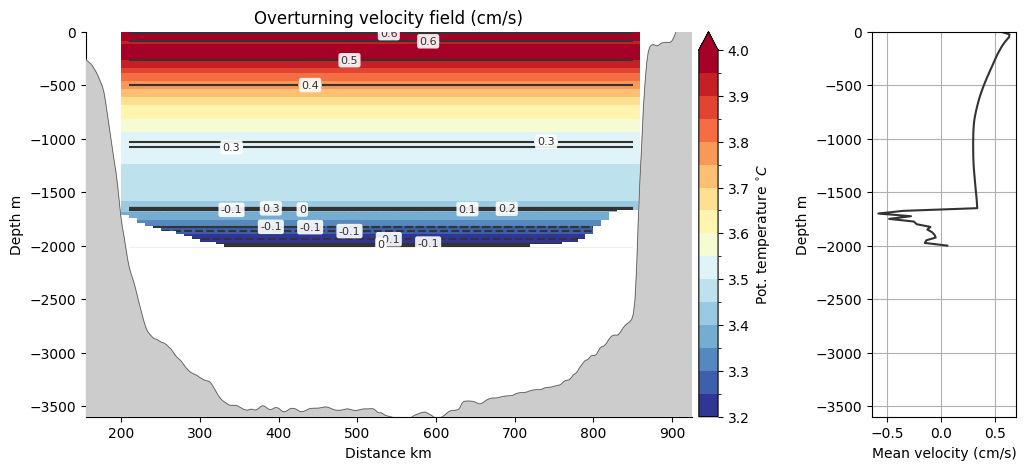

In [336]:
import matplotlib.gridspec as gridspec

levels = [-0.1, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]


# Create a figure with gridspec
fig = plt.figure(figsize=(12, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[5, 1], wspace=0.15)

# Main plot (left)
ax_main = fig.add_subplot(gs[0])
segmented_cmap = LinearSegmentedColormap.from_list('segmented_cmap', plt.cm.RdYlBu(np.linspace(0, 1, 256)))
value_range = np.arange(3.2, 4.05, 0.05)
norm = BoundaryNorm(value_range, ncolors=segmented_cmap.N, clip=True)
vticks_vel = [3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0]

pc = ax_main.pcolormesh(X, Z * 1e3, mean_pt_v, cmap=segmented_cmap.reversed(), norm=norm)
ax_main.pcolormesh(X, Z * 1e3, masked_zeros, cmap='Greys', vmin=0, vmax=1, zorder=2)
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=segmented_cmap.reversed()), ax=ax_main, ticks=vticks_vel, pad=0.01, aspect=20, extend='max')
cbar.set_label(r'Pot. temperature $^{\circ}C$')

con = ax_main.contour(Xhalf, Zhalf * 1e3, mean_v, levels, colors=[.2, .2, .2], zorder=1)
con0 = ax_main.contour(Xhalf, Zhalf * 1e3, mean_v, [0], colors=[.2, .2, .2], linewidths=3, zorder=1)

# Dynamically calculate label positions
manual_locations = []
dxx = 10
for i, level in enumerate(levels):
    for segment in con.allsegs[i]:  # Iterate over all segments for this level
        x_center = np.mean(segment[:, 0])
        z_center = np.mean(segment[:, 1])
        if np.isnan(x_center) or np.isnan(z_center):
            continue
        manual_locations.append((x_center - 200 + dxx, z_center))  # Add to manual locations
        dxx += 50
        if dxx > 450:
            dxx = 10

manual_locations0 = []
dxx = -100
for segment in con0.allsegs[0]:
    x_center = np.mean(segment[:, 0])
    z_center = np.mean(segment[:, 1])
    manual_locations0.append((x_center + dxx, z_center))
    dxx += 100

# Add labels to contours with smaller boxes but the same font size
for text in ax_main.clabel(con, inline=True, fmt='%.1f', fontsize=8, manual=manual_locations):
    text.set_bbox(dict(facecolor='white', edgecolor='none', alpha=0.9, boxstyle='round,pad=0.2', linewidth=0.5))

for text in ax_main.clabel(con0, inline=True, fmt='%1.0f', fontsize=8, manual=manual_locations0):
    text.set_bbox(dict(facecolor='white', edgecolor='none', alpha=0.9, boxstyle='round,pad=0.2', linewidth=0.5))

# Plot the topography
ax_main.plot(x_topo, topo * -1, color=[.3, .3, .3], linewidth=0.5, zorder=4)
ax_main.fill_betweenx(topo * -1, x_topo, where=(x_topo <= 600), color=[.8, .8, .8], zorder=3)
right_mask = (x_topo >= 600)
ax_main.fill_betweenx(topo[right_mask] * -1, x_topo[right_mask], x2=4000, color=[.8, .8, .8], zorder=3)

ax_main.set_xlim([155, 925])
ax_main.set_ylim([-3600, 0])
ax_main.set_xlabel('Distance km')
ax_main.set_ylabel('Depth m')
ax_main.set_title('Overturning velocity field (cm/s)')

# disable axis lines top and right
ax_main.spines['top'].set_visible(False)
ax_main.spines['right'].set_visible(False)
ax_main.spines['left'].set_visible(True)
ax_main.spines['bottom'].set_visible(True)

# Subplot (right)
ax_sub = fig.add_subplot(gs[1])
ax_sub.plot(mean_v[:, 0], z * 1e3, color=[.2, .2, .2], linewidth=1.5)
ax_sub.set_xlabel('Mean velocity (cm/s)')
ax_sub.set_ylabel('Depth m')
ax_sub.set_ylim([-3600, 0])
ax_sub.grid(True)

plt.tight_layout()
plt.savefig(parent_dir / f'figures/mean_overturning_velocity_field_polyfit_xstart{xstart}.png')
plt.show()

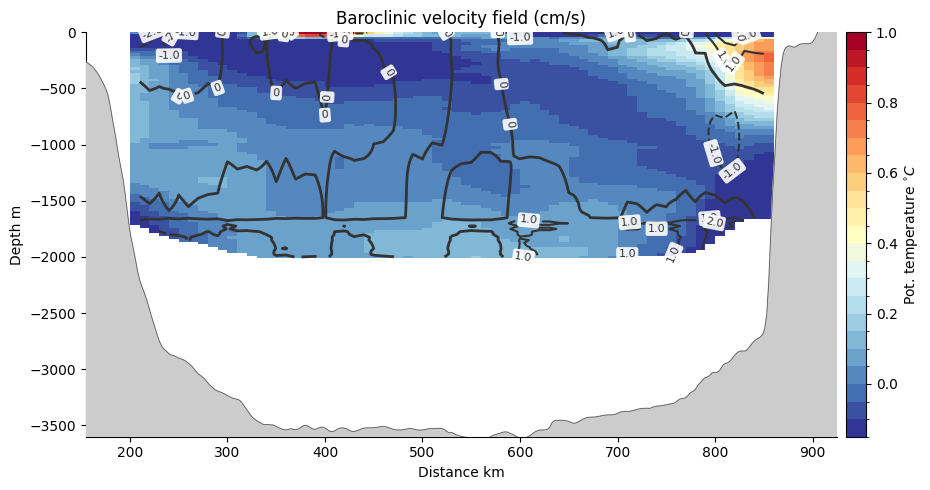

In [337]:
from matplotlib.colors import LinearSegmentedColormap
import numpy.ma as ma

levels = [-10, -8,-6, -4, -2, -1, 1, 2, 4, 6, 8,10]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

segmented_cmap = LinearSegmentedColormap.from_list('segmented_cmap', plt.cm.RdYlBu(np.linspace(0, 1, 256)))
value_range = np.arange(-0.15,1.05, 0.05)
norm = BoundaryNorm(value_range, ncolors=segmented_cmap.N, clip=True)
vticks_vel = [0, 0.2, 0.4, 0.6, 0.8, 1]

pc = ax.pcolormesh(X, Z * 1e3, pt_baroclinic, cmap=segmented_cmap.reversed(), norm=norm)
ax.pcolormesh(X, Z * 1e3, masked_zeros, cmap='Greys', vmin=0, vmax=1, zorder=2)
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=segmented_cmap.reversed()), ticks=vticks_vel, ax=ax, pad=0.01, aspect=20)
cbar.set_label(r'Pot. temperature $^{\circ}C$')


# Draw contour lines
C = 2
con  = ax.contour(Xhalf, Zhalf * 1e3, v_baroclinic, levels, colors=[0.1*C, 0.1*C, 0.1*C], zorder=1)
con0 = ax.contour(Xhalf, Zhalf * 1e3, v_baroclinic, [0], colors=[0.1*C, 0.1*C, 0.1*C], linewidths=2, zorder=1)

# Dynamically calculate label positions
manual_locations = []
dxx = 80
for i, level in enumerate(levels):
    for segment in con.allsegs[i]:  # Iterate over all segments for this level
        # Get the center of the contour segment
        x_center = np.mean(segment[:, 0])
        z_center = np.mean(segment[:, 1])
        if np.isnan(x_center) or np.isnan(z_center):
            continue
        manual_locations.append((x_center, z_center+800-dxx))  # Add to manual locations
        dxx += 240
        if dxx > 1500:
            dxx = 80

manual_locations0 = []
dxx = 300
for segment in con0.allsegs[0]:
    x_center = np.mean(segment[:, 0])
    z_center = np.mean(segment[:, 1])
    manual_locations0.append((x_center, z_center+dxx))
    dxx += 100

# Add labels to contours with smaller boxes but the same font size
for text in ax.clabel(con, inline=True, fmt='%1.1f', fontsize=8, manual=manual_locations):
    text.set_bbox(dict(facecolor='white', edgecolor='none', alpha=0.9, boxstyle='round,pad=0.2', linewidth=0.5))
    

for text in ax.clabel(con0, inline=True, fmt='%1.0f', fontsize=8, manual=manual_locations0):
    text.set_bbox(dict(facecolor='white', edgecolor='none', alpha=0.9, boxstyle='round,pad=0.2', linewidth=0.5))

# Plot the topography
ax.plot(x_topo, topo * -1, color=[.3, .3, .3], linewidth=0.5, zorder=4)
ax.fill_betweenx(topo * -1, x_topo, where=(x_topo <= 600), color=[.8, .8, .8], zorder=3)
right_mask = (x_topo >= 600)
ax.fill_betweenx(topo[right_mask] * -1, x_topo[right_mask], x2=4000, color=[.8, .8, .8], zorder=3)

plt.xlim([155, 925])
plt.ylim([-3600, 0])


plt.xlabel('Distance km')
plt.ylabel('Depth m')
plt.title('Baroclinic velocity field (cm/s)')

# disable axis lines top and right
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
plt.tight_layout()


plt.savefig(parent_dir / f'figures/baroclinic_velocity_field_polyfit_xstart{xstart}.png')
plt.show()

In [181]:
v = v_argo_200
mask = ~np.isnan(v)
vel    = xr.DataArray(data = v,
                dims = ["depth", "distance"],
                coords = dict(depth = z,
                                distance = xhalf_200),)
    
delta_x = np.array([len(mask[i])-len(np.where(mask[i] == False)[0]) for i in range(len(mask))])*spacing_x
delta_z = np.array([len(mask[:,i])-len(np.where(mask[:,i] == False)[0]) for i in range(mask.shape[1])])*spacing_z
        
vp = (vel - vel.mean(dim='distance', skipna=True) )
vh = vp.mean(dim='depth', skipna=True)

# Perform piecewise integration along the depth and distance dimensions
Dx = 10*1e3 #m
piecewise_trapz_z_200 = np.array([
    scipy.integrate.trapezoid(vel.mean(dim="distance", skipna=True)[i:i+2] * delta_x[i:i+2]*1e3, x=vel.depth[i:i+2]*-1e3) * 10**(-6)
    for i in range(len(vel.depth) - 1)
])

Dz = 2000 # m
piecewise_trapz_x_200 = np.array([
    scipy.integrate.trapezoid(vh[~np.isnan(vh)][i:i+2] * delta_z[i:i+2], x=vel.distance[~np.isnan(vh)][i:i+2]*1e3) * 10**(-6)
    for i in range(len(vel.distance) - 1)
])

In [280]:
v = v_ctd_200
mask = ~np.isnan(v)
vel    = xr.DataArray(data = v,
                dims = ["depth", "distance"],
                coords = dict(depth = z,
                                distance = xhalf_200),)
    
delta_x = np.array([len(mask[i])-len(np.where(mask[i] == False)[0]) for i in range(len(mask))])*spacing_x
delta_z = np.array([len(mask[:,i])-len(np.where(mask[:,i] == False)[0]) for i in range(mask.shape[1])])*spacing_z
        
vp = (vel - vel.mean(dim='distance', skipna=True) )
vh = vp.mean(dim='depth', skipna=True)

# Perform piecewise integration along the depth and distance dimensions
Dx = 10*1e3 #m
piecewise_trapz_z_200_ctd = np.array([
    scipy.integrate.trapezoid(vel.mean(dim="distance", skipna=True)[i:i+2] * delta_x[i:i+2]*1e3, x=vel.depth[i:i+2]*-1e3) * 10**(-6)
    for i in range(len(vel.depth) - 1)
])

Dz = 2000 # m
piecewise_trapz_x_200_ctd = np.array([
    scipy.integrate.trapezoid(vh[~np.isnan(vh)][i:i+2] * delta_z[i:i+2], x=vel.distance[~np.isnan(vh)][i:i+2]*1e3) * 10**(-6)
    for i in range(len(vel.distance) - 1)
])

In [178]:
v = v_argo_205
mask = ~np.isnan(v)
vel    = xr.DataArray(data = v,
                dims = ["depth", "distance"],
                coords = dict(depth = z,
                                distance = xhalf_205))
    
delta_x = np.array([len(mask[i])-len(np.where(mask[i] == False)[0]) for i in range(len(mask))])*spacing_x
delta_z = np.array([len(mask[:,i])-len(np.where(mask[:,i] == False)[0]) for i in range(mask.shape[1])])*spacing_z
        
vp = (vel - vel.mean(dim='distance', skipna=True) )
vh = vp.mean(dim='depth', skipna=True)

# Perform piecewise integration along the depth and distance dimensions
Dx = 10*1e3 #m
piecewise_trapz_z_205 = np.array([
    scipy.integrate.trapezoid(vel.mean(dim="distance", skipna=True)[i:i+2] * delta_x[i:i+2]*1e3, x=vel.depth[i:i+2]*-1e3) * 10**(-6)
    for i in range(len(vel.depth) - 1)
])

Dz = 2000 # m
piecewise_trapz_x_205 = np.array([
    scipy.integrate.trapezoid(vh[~np.isnan(vh)][i:i+2] * delta_z[i:i+2], x=vel.distance[~np.isnan(vh)][i:i+2]*1e3) * 10**(-6)
    for i in range(len(vel.distance) - 1)
])

In [177]:
delta_x

array([650, 650, 650, 650, 650, 650, 650, 650, 650, 650, 650, 650, 650,
       650, 650, 650, 650, 650, 650, 650, 650, 650, 650, 650, 650, 650,
       650, 650, 650, 650, 650, 650, 650, 650, 650, 650, 650, 650, 650,
       650, 650, 650, 650, 650, 650, 650, 650, 650, 650, 650, 650, 650,
       650, 650, 650, 650, 650, 650, 650, 650, 650, 650, 650, 650, 650,
       650, 650, 630, 620, 610, 600, 590, 570, 560, 540, 530, 520, 510,
       480, 450, 390])

In [281]:
strf_z_argo_200, strf_x_argo_200, imbalance_argo_200, mask_x_200 = tools.derive_strf(v_argo_200, xhalf_200*1e3, z*-1e3)
strf_z_argo_205, strf_x_argo_205, imbalance_argo_205, mask_x_205 = tools.derive_strf(v_argo_205, xhalf_205*1e3, z*-1e3)
strf_z_ctd_200, strf_x_ctd_200, imbalance_ctd_200, mask_xc_200 = tools.derive_strf(v_ctd_200, xhalf_200*1e3, z*-1e3)


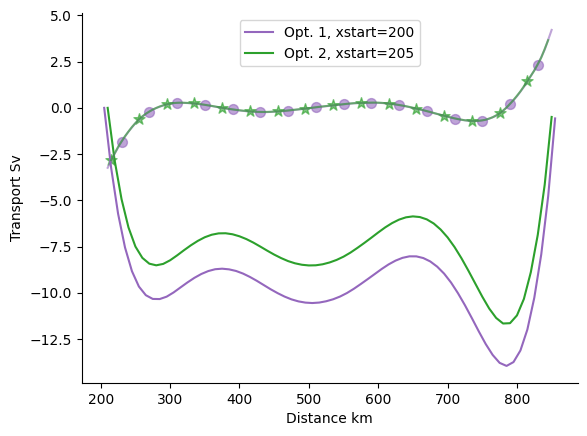

In [292]:
fig, ax = plt.subplots()

ax.plot(xhalf_200,strf_x_argo_200, color='tab:purple', label='Opt. 1, xstart=200')
ax.plot(xhalf_205, strf_x_argo_205,  color='tab:green', label='Opt. 2, xstart=205')
#ax.plot(xhalf_200, strf_x_ctd_200, linestyle='--', color='tab:orange', label='CTD data')

x200 = np.arange(210,860,10)
x205 = np.arange(215,855,10)

ax.plot(x200, piecewise_trapz_x_200, color='tab:purple', alpha=0.6)
ax.plot(x205, piecewise_trapz_x_205,  color='tab:green', alpha=0.6)

ax.scatter(x200[2::4], piecewise_trapz_x_200[2::4], s=50, marker='o', color='tab:purple', alpha=0.6)
ax.scatter(x205[::4], piecewise_trapz_x_205[::4], s=70, marker='*', color='tab:green', alpha=0.6)
#ax.scatter(x200[::4], piecewise_trapz_x_200_ctd[::4], s=70, marker='+', color='tab:orange', alpha=0.6)

ax.legend(loc='upper center')
ax.set_xlabel('Distance km')
ax.set_ylabel('Transport Sv')

#disable axis lines top and right
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig(parent_dir / 'figures/horizontal_transport_200_205.png', dpi=300, bbox_inches='tight')
plt.show()


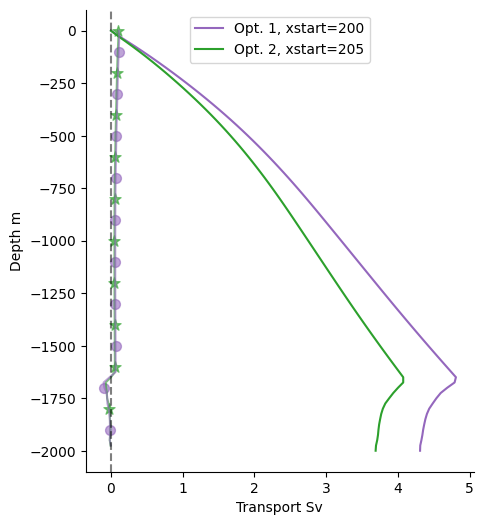

In [290]:
fig, ax = plt.subplots(figsize=(5, 6))

ax.plot(strf_z_argo_200, z*1e3, color='tab:purple', label='Opt. 1, xstart=200')
ax.plot(strf_z_argo_205, z*1e3, color='tab:green', label='Opt. 2, xstart=205')
#ax.plot(strf_z_ctd_200, z*1e3, linestyle='--', color='tab:orange', label='CTD data')	

z200 = np.arange(0,2000,25)*-1

ax.plot(piecewise_trapz_z_205, z200, color='tab:green', alpha=0.6)
ax.plot(piecewise_trapz_z_200, z200, color='tab:purple', alpha=0.6)

ax.scatter(piecewise_trapz_z_200[4::8], z200[4::8], s=50, marker='o', color='tab:purple', alpha=0.6)
ax.scatter(piecewise_trapz_z_205[::8], z200[::8], s=70, marker='*', color='tab:green', alpha=0.6)
#ax.scatter(piecewise_trapz_z_200_ctd[::8], z200[::8], s=70, marker='+', color='tab:orange', alpha=0.6)

ax.legend(loc='upper center')
ax.set_ylabel('Depth m')
ax.set_xlabel('Transport Sv')

ax.axvline(0, color='k', linestyle='--', linewidth=1.5, alpha=0.5)
#disable axis lines top and right
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig(parent_dir / 'figures/vertical_transport_200_205.png', dpi=300, bbox_inches='tight')
plt.show()

# Testing different argo velocity fits

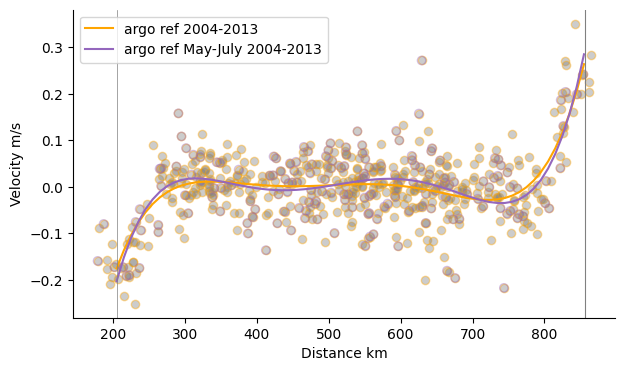

In [217]:
poly_func_2023, x23, y23 = ref.derive_poly_func(input_file, start_time='2004-01-01', end_time='2013-12-31', cut_season=True, season='mayjunjul', returnXY=True)
argo_ref_2023 = poly_func_2023(xhalf_200) / 100

poly_func, x13, y13 = ref.derive_poly_func(input_file, start_time='2004-01-01', end_time='2013-12-31', cut_season=False, season='mayjunjul', start_x=205, end_x=855, returnXY=True, degree=5)
argo_ref = poly_func(xhalf_200) / 100

#plt.plot(xhalf_200, argo_ref_200, 'r-')
plt.figure(figsize=(7, 4))
plt.plot(xhalf_200, argo_ref, 'orange', label='argo ref 2004-2013')
plt.plot(xhalf_200, argo_ref_2023, 'tab:purple', label='argo ref May-July 2004-2013')
plt.scatter(x13, y13/100, edgecolor='orange', facecolor='gray', alpha=0.4)
plt.scatter(x23, y23/100, edgecolor='tab:purple', facecolor='none', alpha=0.4)
plt.axvline(205, color='gray', linestyle='-', linewidth=0.5)
plt.axvline(856, color='gray', linestyle='-', linewidth=0.8)
plt.legend()
plt.xlabel('Distance km')
plt.ylabel('Velocity m/s')
# disble axis lines top and right
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.savefig(parent_dir / 'figures/argo_ref_velocity_all.png')
plt.show()


poly_func_base, x13, y13 = ref.derive_poly_func(input_file, start_time='2004-01-01', end_time='2013-12-31', cut_season=True, season='mayjunjul', start_x=205, end_x=855, returnXY=True, degree=5)
poly_func_cut, x13, y13 = ref.derive_poly_func(input_file, start_time='2004-01-01', end_time='2013-12-31', cut_season=True, season='mayjunjul', start_x=205, end_x=855, cut_edges=True, returnXY=True, degree=5)


c:\Users\schul\OneDrive\Dokumente\Arbeit\Uni HH 2025\labsea-project\labsea-env\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.83212e-29): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


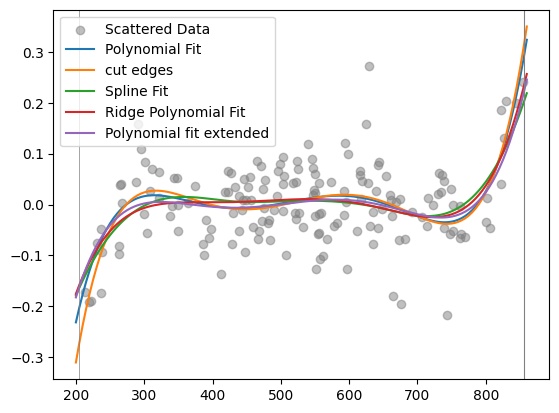

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

xtest = np.arange(200, 865, 5)
argo_ref_base = poly_func(xtest) / 100 
argo_ref_2023 = poly_func_2023(xtest) / 100
argo_ref_cut = poly_func_cut(xtest) / 100

# spline
from scipy.interpolate import UnivariateSpline
spline = UnivariateSpline(x13, y13/100, s=0.75)  # Adjust `s` for smoothing (0 = exact fit)
argo_spline = spline(xtest)

# Fit a polynomial with regularization
degree = 5

ridge1 = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=30.0))
ridge1.fit(x13.reshape(-1, 1), y13/100)
argo_ridge = ridge1.predict(xtest.reshape(-1, 1))

# Plot the result
plt.scatter(x13, y13/100, label='Scattered Data', color='gray', alpha=0.5)
plt.plot(xtest, argo_ref_base, label='Polynomial Fit')
plt.plot(xtest, argo_ref_cut, label='cut edges')
plt.plot(xtest, argo_spline, label='Spline Fit')
plt.plot(xtest, argo_ridge, label='Ridge Polynomial Fit')
plt.plot(xtest, argo_ref_2023, label='Polynomial fit extended')
plt.axvline(205, color='gray', linestyle='-', linewidth=0.5)
plt.axvline(856, color='gray', linestyle='-', linewidth=0.8)
plt.legend()
plt.savefig(parent_dir / 'figures/argo_ref_velocity_diff_fits.png')
plt.show()

In [ ]:
# Extract values at xtest[1] and xtest[-1]
values = {
    "Fit Type": ["Polynomial Fit", "Cut Edges", "Spline Fit", "Ridge Polynomial Fit", "Polynomial Fit Extended"],
    "x=205": [
        round(argo_ref_base[1], 3),
        round(argo_ref_cut[1], 3),
        round(argo_spline[1], 3),
        round(argo_ridge[1], 3),
        round(argo_ref_2023[1], 3),
    ],
    "x=210": [
        round(argo_ref_base[2], 3),
        round(argo_ref_cut[2], 3),
        round(argo_spline[2], 3),
        round(argo_ridge[2], 3),
        round(argo_ref_2023[2], 3),
    ],
    "x=855": [
        round(argo_ref_base[-2], 3),
        round(argo_ref_cut[-2], 3),
        round(argo_spline[-2], 3),
        round(argo_ridge[-2], 3),
        round(argo_ref_2023[-2], 3),
    ],
    "x=860": [
        round(argo_ref_base[-1], 3),
        round(argo_ref_cut[-1], 3),
        round(argo_spline[-1], 3),
        round(argo_ridge[-1], 3),
        round(argo_ref_2023[-1], 3),
    ],
    "mean vel cm/s \n (x[200,860])": [
        round(np.nanmean(argo_ref_base)*100, 3),
        round(np.nanmean(argo_ref_cut)*100, 3),
        round(np.nanmean(argo_spline)*100, 3),
        round(np.nanmean(argo_ridge)*100, 3),
        round(np.nanmean(argo_ref_2023)*100, 3),
    ],
    "mean vel cm/s \n (x[205,855])": [
        round(np.nanmean(argo_ref_base[1:-1])*100, 3),
        round(np.nanmean(argo_ref_cut[1:-1])*100, 3),
        round(np.nanmean(argo_spline[1:-1])*100, 3),
        round(np.nanmean(argo_ridge[1:-1])*100, 3),
        round(np.nanmean(argo_ref_2023[1:-1])*100, 3),
    ],
}

# Display the table
import pandas as pd
df = pd.DataFrame(values)
from tabulate import tabulate

print(tabulate(df, headers="keys", tablefmt="pipe", showindex=False))

| Fit Type                |   x=205 |   x=210 |   x=855 |   x=860 |   mean vel cm/s  |   mean vel cm/s  |
|                         |         |         |         |         |     (x[200,860]) |     (x[205,855]) |
|:------------------------|--------:|--------:|--------:|--------:|-----------------:|-----------------:|
| Polynomial Fit          |  -0.203 |  -0.176 |   0.285 |   0.324 |            0.396 |            0.331 |
| Cut Edges               |  -0.272 |  -0.237 |   0.307 |   0.35  |            0.198 |            0.171 |
| Spline Fit              |  -0.164 |  -0.149 |   0.199 |   0.219 |            0.204 |            0.176 |
| Ridge Polynomial Fit    |  -0.158 |  -0.142 |   0.229 |   0.257 |            0.199 |            0.14  |
| Polynomial Fit Extended |  -0.162 |  -0.142 |   0.217 |   0.246 |           -0.009 |           -0.058 |


c:\Users\schul\OneDrive\Dokumente\Arbeit\Uni HH 2025\labsea-project\labsea-env\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.83212e-29): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Horizontal imbalance poly fit: -0.57 Sv
Horizontal imbalance cut edges: -0.19 Sv
Horizontal imbalance spline: -0.22 Sv
Horizontal imbalance ridge polyfit: -0.52 Sv
Horizontal imbalance poly fit extended: -0.42 Sv


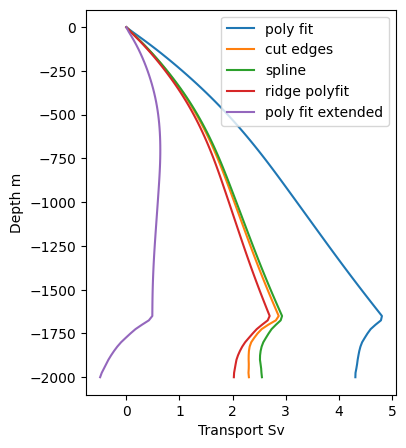

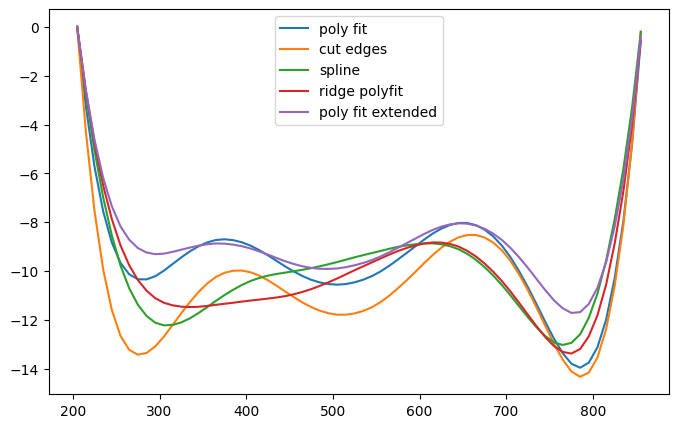

In [ ]:
# specvol_anom_argo, sigma0_argo, P, argo_func, lon_ar7w, lat_ar7w, xhalf, Zhalf

argo_ref_base = poly_func(xhalf_200) / 100 
argo_ref_2023 = poly_func_2023(xhalf_200) / 100
argo_ref_cut = poly_func_cut(xhalf_200) / 100
argo_spline = spline(xhalf_200)

# Fit a polynomial with regularization
degree = 5

ridge1 = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=30.0))
ridge1.fit(x13.reshape(-1, 1), y13/100)
argo_ridge = ridge1.predict(xhalf_200.reshape(-1, 1))

list_functions = [argo_ref_base, argo_ref_cut, argo_spline, argo_ridge, argo_ref_2023]
used_fit = ['poly fit', 'cut edges', 'spline', 'ridge polyfit', 'poly fit extended']
imb_list = []

# calculte strf
fig1, ax1 = plt.subplots(1, 1, figsize=(4, 5))
fig2, ax2 = plt.subplots(1, 1, figsize=(8, 5))

p1, p2  = [None]*len(list_functions), [None]*len(list_functions)

for i, argo_func in enumerate(list_functions):
    v_argo, sigma0half_argo = tools.derive_abs_geo_v(specvol_anom_argo_200, sigma0_argo_200, P_200, argo_func, lon_ar7w_200, lat_ar7w_200, xhalf_200, Zhalf_200)
    strf_z_argo, strf_x_argo, imbalance_argo, mask_xa = tools.derive_strf(v_argo, xhalf_200*1e3, z*-1e3)

    imb_list.append(imbalance_argo)

    p1[i] = ax1.plot(strf_z_argo, z*1e3, label=used_fit[i])
    p2[i] = ax2.plot(xhalf_200[~mask_xa], strf_x_argo, label=used_fit[i])

ax1.legend()
ax1.set_xlabel('Transport Sv')
ax1.set_ylabel('Depth m')

ax2.legend()

for i, imb in enumerate(imb_list):
    print(f'Horizontal imbalance {used_fit[i]}: {imb.round(2)} Sv')

fig1.savefig(parent_dir / 'figures/strf_z_comparison_fits.png')
fig2.savefig(parent_dir / 'figures/strf_x_comparison_fits.png')

plt.show()

c:\Users\schul\OneDrive\Dokumente\Arbeit\Uni HH 2025\labsea-project\labsea-env\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\schul\OneDrive\Dokumente\Arbeit\Uni HH 2025\labsea-project\labsea-env\Lib\site-packages\numpy\_core\_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


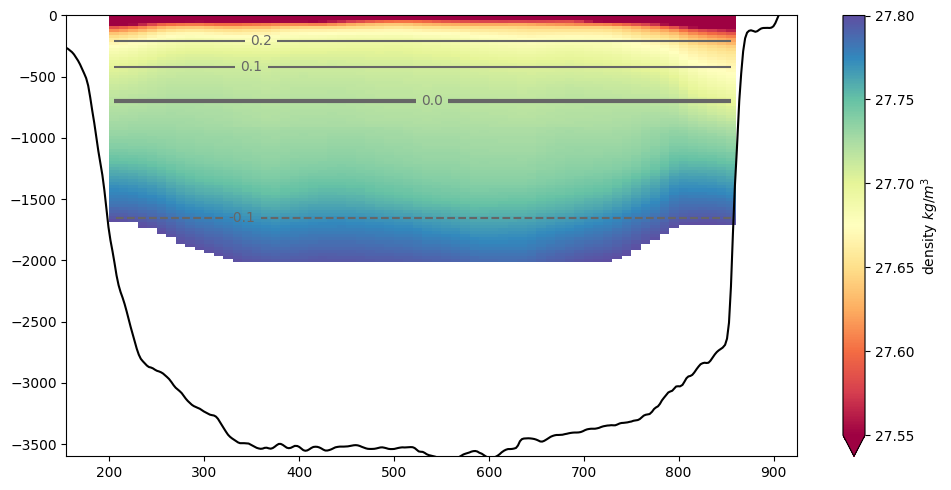

In [ ]:
# mean horizontal velocity field
v = v_argo
mean_v = np.zeros_like(v)
for k in range(v.shape[1]):
    mean_v[:,k] = np.nanmean(v, axis=1)*100 # cm

levels = [-0.1, 0.1, 0.2, 0.4]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# Plot the density field
pc = ax.pcolormesh(Xhalf, Zhalf * 1e3, sigma0half, vmin=27.55, vmax=27.8, cmap='Spectral')
cbar = plt.colorbar(pc, ax=ax, extend='min')
cbar.set_label(r'density $kg/m^{3}$')
con = ax.contour(Xhalf, Zhalf*1e3, mean_v, levels, colors=[.4,.4,.4])
con0 =  ax.contour(Xhalf, Zhalf*1e3, mean_v, [0],  colors=[.4,.4,.4], linewidths=3) 

# Dynamically calculate label positions
manual_locations = []
dxx = 10
for i, level in enumerate(levels):
    for segment in con.allsegs[i]:  # Iterate over all segments for this level
        # Get the center of the contour segment
        x_center = np.mean(segment[:, 0])
        z_center = np.mean(segment[:, 1])
        if np.isnan(x_center) or np.isnan(z_center):
            continue
        manual_locations.append((x_center-200+dxx, z_center))  # Add to manual locations
        dxx += 10

manual_locations0 = []
dxx = 10
for segment in con0.allsegs[0]:
    x_center = np.mean(segment[:, 0])
    z_center = np.mean(segment[:, 1])
    manual_locations0.append((x_center+dxx, z_center))
    dxx += 10

ax.clabel(con, manual=manual_locations, inline=True, fmt='%1.1f', fontsize=10)	
ax.clabel(con0, manual=manual_locations0, inline=True, fmt='%1.1f', fontsize=10)
plt.xlim([155,925])
plt.ylim([-3600,0]) 
plt.plot(x_topo, topo*-1, color='k')
plt.tight_layout()
#plt.savefig('figures/mean_vertical_velocity_field.png')
plt.show()